In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

torch.manual_seed(999)


######################################## 


#  Loading and normalizing CIFAR10

transform = transforms.Compose([transforms.ToTensor(), 
     transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)),
     ])

# .Compose() composes several transformations together
# . ToTensor() convers images and np arrays into torch tensors
# .Normalize()

# Download CIFAR10 Dataset

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)


######################################## 



Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified



In [2]:
print(len(trainset))
len(testset)

50000


10000

In [0]:
batch_size = 100 # chosen
n_iters = 20000 # 50,000 / batch_size = 5000 and 500 * 5=2500
num_epochs = n_iters / (len(trainset)/batch_size)
num_epochs = int(num_epochs)

# Load Data
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [4]:
num_epochs

40

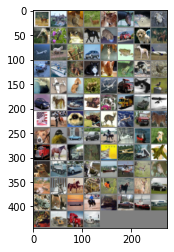

      deer       deer        cat       deer       deer      horse        dog       frog       bird       bird


In [5]:
# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%10s' % classes[labels[j]] for j in range(10)))

In [6]:
print(images.size())
labels.size()

torch.Size([100, 3, 32, 32])


torch.Size([100])

In [0]:
class FNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FNN, self).__init__()

        # Linear Function
        self.fc1 = nn.Linear(input_dim, hidden_dim) # has 2 params

        # Non Linearity
        self.relu = nn.ReLU()

        # second linear funtion
        self.fc2 = nn.Linear(hidden_dim, output_dim) # has 2 params
    
    def forward(self, x):
#         print("x size is {}".format(x.size()))

        #Linear Function
        out = self.fc1(x)

        # Non Linearity
        out = self.relu(out)

        # Linear Function (read out)
        out = self.fc2(out)

        # print("Final size is {}".format(out.size())
        return out

In [0]:
# define the model parameters
input_dim = 1024*3  # 32x32*3 image size = 1024 pixels * 3 channels
output_dim = 10  # 10 classes (animals)
hidden_dim = 500 # can be any number of neurons or non 

# model
model = FNN(input_dim,hidden_dim, output_dim)

In [0]:
# define the loss criteria and Optimizer

criterion = nn.CrossEntropyLoss() 
# Cross Entropy is good for classification
# its required to compute the loss btn softmax outputs and binary labels

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [10]:
# display the number of params we have
  # 2 linear layers of the form Y = AX + B
    # Each linear layer has 2 params, A and B 
      # therfore we have A_1, A_2, B_1, and B_2
print(len(list(model.parameters())))

4


In [11]:
# fc1 slope params
print(list(model.parameters())[0].size())

# the first linear layer parameters for A_1 has size= [hidden_layer, input_dim]
  # hidden_layer = 100 and input_dim = 32 x 32

torch.Size([500, 3072])


In [12]:
# fc1 bias params
print(list(model.parameters())[1].size())

# this is the first linear layer params for bias B_1 with the size 100
  # since the dim of hidden layers is 100


torch.Size([500])


In [13]:
# fc2 slope params
print(list(model.parameters())[2].size())

# the second linear layer has size 10 x 100 for A_2. 
# the next size is the output size which is 10
# the input size from the previous operation is 100 (hidden layers)

torch.Size([10, 500])


In [14]:
# f2 bias params
print(list(model.parameters())[3].size())

# the second linear layer bias has size 10 since the output dim is 10

# and so the final output size will be 10x1


torch.Size([10])


In [15]:
iteration = 1

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(trainloader):

        # load images with gradient accumulation capabilities
        images = Variable(images.view(-1, 3*32*32))


        labels = Variable(labels)

        
        # clear gradients from previous iters w.r.t params
        optimizer.zero_grad()

        # forward pass to get outputs
        outputs = model(images)

        # Calculate loss
        loss = criterion(outputs, labels)

        # getting gradients w.r.t params
        loss.backward()

        # updating params
        optimizer.step()

        iteration += 1

        # report every 1000 iters
        if iteration % 1000 == 0:
          correct = 0
          total = 0
          
          for images, labels in trainloader:
            images = Variable(images.view(-1, 3*32*32))
            labels = Variable(labels)
              
            outputs = model(images)
          
            _, predict = torch.max(outputs.data,1)

            
            # total number of labels
            total += labels.size(0)
            
            # correct predictions
            correct += (predict == labels).sum()

            
          accuracy = int(correct) / int(total) * 100
            
          print('Iter {} | Loss: {} | Accuracy: {}%'.format(iteration, 
                                                             loss.item(),
                                                            accuracy))
      

Iter 1000 | Loss: 1.5735968351364136 | Accuracy: 52.126%
Iter 2000 | Loss: 1.669571042060852 | Accuracy: 58.424%
Iter 3000 | Loss: 1.3162963390350342 | Accuracy: 59.809999999999995%
Iter 4000 | Loss: 1.0127733945846558 | Accuracy: 64.828%
Iter 5000 | Loss: 1.075040340423584 | Accuracy: 64.474%
Iter 6000 | Loss: 0.8784406185150146 | Accuracy: 69.992%
Iter 7000 | Loss: 1.0523046255111694 | Accuracy: 71.942%
Iter 8000 | Loss: 0.8451917171478271 | Accuracy: 75.762%
Iter 9000 | Loss: 0.5768898129463196 | Accuracy: 77.05%
Iter 10000 | Loss: 0.5818859338760376 | Accuracy: 81.112%
Iter 11000 | Loss: 0.8356943726539612 | Accuracy: 77.51400000000001%
Iter 12000 | Loss: 0.5270522832870483 | Accuracy: 84.272%
Iter 13000 | Loss: 0.5427148938179016 | Accuracy: 85.684%
Iter 14000 | Loss: 0.45732730627059937 | Accuracy: 87.548%
Iter 15000 | Loss: 0.4219001829624176 | Accuracy: 87.39%
Iter 16000 | Loss: 0.41074123978614807 | Accuracy: 90.59%
Iter 17000 | Loss: 0.5625070929527283 | Accuracy: 84.352%
Ite

In [20]:
# Save the model
PATH = './cifar_fnn_model.pth'
torch.save(model.state_dict(), PATH)

# Load the model
model = FNN(input_dim,hidden_dim, output_dim)
model.load_state_dict(torch.load(PATH))


<All keys matched successfully>

In [21]:
model

FNN(
  (fc1): Linear(in_features=3072, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

In [18]:
# Validation 

for images, labels in testloader:
    images = images.reshape([100,3*1024])
    labels = Variable(labels)

    outputs = model(images)

    _, predict = torch.max(outputs.data,1)


    # total number of labels
    total += labels.size(0)

    # correct predictions
    correct += (predict == labels).sum()

  # print('predict shape {}, labels shape {}, Correct Num {}'.format(predict.shape,
  #                                                                  labels.shape,
  #                                                                 correct))

accuracy = int(correct) / int(total) * 100

accuracy

85.05333333333334

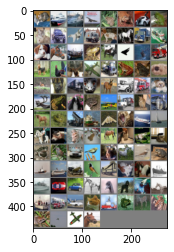

       cat       ship       ship      plane       frog       frog        car       frog        cat        car


In [19]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%10s' % classes[labels[j]] for j in range(10)))